In [104]:
import numpy as np
import matplotlib.pyplot as plt
import h5py # permite cargar archivos desde el drive propio
from skimage import transform # permite escalar las imagenes

In [68]:
def load_dataset():
  train_dataset = h5py.File('/content/drive/MyDrive/Colab Notebooks/train_catvnoncat.h5', 'r')
  train_set_x_orig = np.array(train_dataset['train_set_x'][:])
  train_set_y_orig = np.array(train_dataset['train_set_y'][:])

  test_dataset = h5py.File('/content/drive/MyDrive/Colab Notebooks/test_catvnoncat.h5', 'r')
  test_set_x_orig = np.array(test_dataset['test_set_x'][:])
  test_set_y_orig = np.array(test_dataset['test_set_y'][:])

  classes = np.array(test_dataset['list_classes'][:])

  train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
  test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

  return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [69]:
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes = load_dataset()

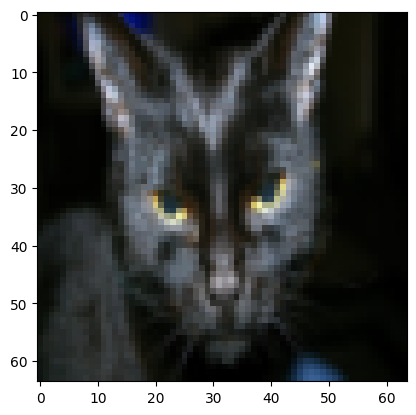

In [70]:
plt.imshow(train_set_x_orig[25])

In [71]:
def sigmoid(z):

  s = 1/(1 + np.exp(-z))

  return s

In [72]:
sigmoid(np.array([0, 2])) # aplicando la funciona a un arreglo

array([0.5       , 0.88079708])

In [46]:
def initialized_with_zeros(dim):

  w = np.zeros((dim,1))
  b = 0

  return w, b

In [73]:
w, b = initialized_with_zeros(2)
print('w =', w)
print('b =', b)

w = [[0.]
 [0.]]
b = 0


In [74]:
 # Foward propagation
def propagate(w, b, X, Y):

  # Se hace w transpuesta por x, en lugar de x por w, para obtener un vector columna
  # en lugar de un vector fila
  A = sigmoid(np.dot(w.T,X)+b)

  m = X.shape[1]
  # funcion de coste (funcion binary crossentropy)
  cost = -1.0/m * np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))

  # derivadas parciales de la funcion de costo con respecto a 'w' y 'b'
  dw = 1.0/m * np.dot(X, (A-Y).T)
  db = 1.0/m * np.sum(A-Y)

  # el gradiente
  grads = {'dw':dw,
           'db': db}

  return grads, cost


In [75]:
w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])

In [76]:
grads, cost = propagate(w, b, X, Y)

In [77]:
grads # resultado esperado {'dw': array([[0.99993216], [1.99980262]]),'db': 0.49993523062470574}

{'dw': array([[0.99993216],
        [1.99980262]]),
 'db': 0.49993523062470574}

In [78]:
cost # resultados esperado 6.000064773192205

6.000064773192205

In [79]:
 # Back propagation
def optimize(w, b, X, Y, num_iterations, learning_rate):

  costs = []

  for i in range(num_iterations):
    grads, cost = propagate(w, b, X, Y)

    dw = grads['dw']
    db = grads['db']

    # desesenso del gradiente
    w = w - learning_rate * dw
    b = b - learning_rate * db

    # guarda los valores de cost cada 100 iteraciones en una lista
    if i % 100 == 0:
      costs.append(cost)

  params = {'w': w,
            'b': b}

  grads = {'dw': dw,
           'db': db}

  return params, grads, costs

In [80]:
# truco este valor solo es true,  si y solo si a = xb y x es numero entero
# A % b == 0
-200 % 100 == 0 # se usara para iterar cada 100 iteraciones

True

In [81]:
params, grads, costs = optimize(w, b, X, Y, num_iterations = 100, learning_rate= 0.009)

In [82]:
params # resultado esperado {'w': array([[0.1124579 ], [0.23106775]]), 'b': 1.5593049248448891}

{'w': array([[0.1124579 ],
        [0.23106775]]),
 'b': 1.5593049248448891}

In [83]:
grads # resultado esperado {'dw': array([[0.90158428], [1.76250842]]), 'db': 0.4304620716786828}

{'dw': array([[0.90158428],
        [1.76250842]]),
 'db': 0.4304620716786828}

In [84]:
def predict(w, b, X):
  m = X.shape[1]
  y_prediction = np.zeros((1,m))
  w = w.reshape(X.shape[0],1)

  A = sigmoid(np.dot(w.T, X)+ b)

  for i in range(A.shape[1]):
    if A[0, i] > 0.5:
      y_prediction[0,i] = 1 # gatos
    else:
      y_prediction[0,i] = 0 # no gatos

  return y_prediction

In [85]:
predict(w,b,X) # resultado esperado array([[1., 1.]])

array([[1., 1.]])

In [98]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate):
  w, b = initialized_with_zeros(X_train.shape[0])
  parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)

  w = parameters['w']
  b = parameters['b']

  Y_prediction_train = predict(w,b, X_train)
  Y_prediction_test = predict(w,b, X_test)

  print('train acurracy:{}' .format(100-np.mean(np.abs(Y_prediction_train - Y_train)*100)))
  print('train acurracy:{}' .format(100-np.mean(np.abs(Y_prediction_test - Y_test)*100)))

  d={'costs': costs,
     'Y_prediction_test': Y_prediction_test,
     'Y_prediction_tarin': Y_prediction_train,
     'w': w,
     'b': b,
     'learning_rate': learning_rate,
     'num_iterations': num_iterations}

  return d


In [87]:
train_set_x_orig[25].shape
# la imagen del gato negro, es una hipermatriz de 64 x 64 x 3 pixeles
# donde el tercer valor representa 3 matrixes de 64x64 para cada color (rgb)

(64, 64, 3)

In [88]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1)
train_set_x_flatten.shape #209 numero de imagenes, 12288= 64*64*3

(209, 12288)

In [89]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
print(train_set_x_flatten.shape)
print(test_set_x_flatten.shape)

(12288, 209)
(12288, 50)


In [90]:
# np.max(train_set_x_flatten)
# normalizar x/255 logitud de los vectores de rgb 0-255

train_set_x =train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

In [101]:
# modelo usando iteraciones del learning rate
learning_rate =[0.1, 0.01, 0.001, 0.0001]
models = {}
for i in learning_rate:
  models[str(i)] = model(train_set_x, train_set_y_orig, test_set_x, test_set_y_orig, num_iterations = 2000, learning_rate = i)
  print('\n' + '------------------------------------------------')

<ipython-input-74-65cf016b8a16>:10: RuntimeWarning: divide by zero encountered in log
  cost = -1.0/m * np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))
<ipython-input-74-65cf016b8a16>:10: RuntimeWarning: invalid value encountered in multiply
  cost = -1.0/m * np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))


train acurracy:100.0
train acurracy:68.0

------------------------------------------------
train acurracy:99.52153110047847
train acurracy:70.0

------------------------------------------------
train acurracy:91.38755980861244
train acurracy:68.0

------------------------------------------------
train acurracy:71.29186602870814
train acurracy:40.0

------------------------------------------------


In [102]:
# modelo usando un learning rate = 0.005
d = model(train_set_x, train_set_y_orig, test_set_x, test_set_y_orig, num_iterations=2000, learning_rate=0.005 )

train acurracy:99.04306220095694
train acurracy:70.0


¿Es un gato?: [[ True]]


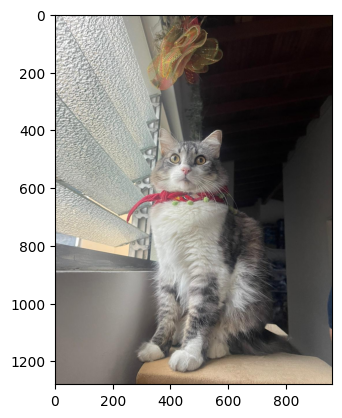

In [119]:
#ruta de la imagen en el drive
my_image = '/content/drive/MyDrive/Deep/imagenes/gato de july.jpeg'

# convierte la imagen en un array de numpy
image = np.array(plt.imread(my_image))

# reescala la imagen,  y luego la transforma en un vector que pueda leer el modelo
my_image = transform.resize(image, output_shape = (64, 64)).reshape((1,64*64*3)).T

# realizar las predicciones ('1' es un gato, '0' no es un gato)
respuesta = predict(d['w'], d['b'], my_image) == 1

print('¿Es un gato?:', respuesta)
#para visualizar la imagen
plt.imshow(image)

In [ ]:
# en el final de la clase muestran como hacer un arreglo de imagenes paraa probar varios imagens a al vez